# **Importing**

In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# **Loading**

In [541]:
raw_data = pd.read_csv('/content/Diagnosis Breast Cancer Dataset.csv')

In [542]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [543]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [544]:
raw_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [545]:
raw_data.eq(0).sum()

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
Unnamed: 32                 0
dtype: int

In [546]:
# raw_data.describe(include='all').T

# **Deleting**

In [547]:
data = raw_data.drop(['Unnamed: 32', 'id'], axis=1)

In [548]:
# data.head()

# **Converting Categorical Data To Numerical Data**

In [549]:
# First Method

# c = 0
# for k in data.diagnosis:
#   if k == 'M':
#     data.diagnosis[c] = 1
#   else:
#     data.diagnosis[c] = 0
#   c += 1
# ---------------------------------------

# Second Method
data.diagnosis = [1 if each == 'M' else 0 for each in data.diagnosis]

In [550]:
# data.head()

In [551]:
# data.dtypes

In [552]:
# data.info()

In [553]:
# data.nunique()

In [554]:
data.diagnosis.unique()

array([1, 0])

In [555]:
# data.head()

# **⭐Declare the dependent and the independent variables**

In [556]:
Xi = data.iloc[:, 1:]    # data.drop(['diagnosis'], axis=1)

In [557]:
yi = data.iloc[:, 0]    # data.diagnosis

In [558]:
# X.head()

In [559]:
# y.head()

# **Standard Scaler**

In [560]:
data1 = np.array([0, 10, 20, 200, 40, 50, 100])

In [561]:
# For Understanding
data2 = (data1 - np.min(data1)) / (np.max(data1) - np.min(data))

In [562]:
# For Understanding
data2

array([0.  , 0.05, 0.1 , 1.  , 0.2 , 0.25, 0.5 ])

In [563]:
X_Scaled = (Xi - np.min(Xi)) / (np.max(Xi) - np.min(Xi))

In [564]:
# X_Scaled

In [565]:
# Xi.columns

# **Concatenate**

In [566]:
# Create a DataFrame with scaled features and the target variable
Normal_DF = pd.DataFrame(np.column_stack([X_Scaled, yi]), columns=list(Xi.columns) + ['diagnosis'])

In [567]:
# Normal_DF.head()

# **⭐Divided Into Training Dataset & Test Dataset**

In [568]:
Training_Dataset, Test_Dataset = tts(Normal_DF, test_size=0.15, random_state=42, shuffle=False)

In [569]:
print(f"Training_Dataset: {Training_Dataset.shape} \nTest_Dataset: {Test_Dataset.shape}\n")

Training_Dataset: (483, 31) 
Test_Dataset: (86, 31)



# **⭐In The Training Dataset**

# **🎇I will divide the Training Dataset again into a Training Dataset and a Validation Dataset**

In [570]:
X_Training_Dataset = Training_Dataset.drop(['diagnosis'], axis=1)

In [571]:
y_Trining_Dataset = Training_Dataset.diagnosis

In [572]:
print(f"x_train: {X_Training_Dataset.shape} & y_train: {y_Trining_Dataset.shape}")

x_train: (483, 30) & y_train: (483,)


#**⭐Divide the above Training Dataset into Training Dataset and Validator Dataset**

In [573]:
x_train, x_va, y_train, y_va = tts(X_Training_Dataset, y_Trining_Dataset, test_size=0.3, random_state=4)

In [574]:
print(f"x_train: {x_train.shape} & y_train: {y_train.shape}\n")
print(f"x_va: {x_va.shape} & y_va: {y_va.shape}")

x_train: (338, 30) & y_train: (338,)

x_va: (145, 30) & y_va: (145,)


# **Model Creating**

In [575]:
robot = LogisticRegression()

# **To learn more about the robot**

In [576]:
robot.max_iter = 100000000

# **Model Learning**

In [577]:
robot.fit(x_train, y_train)

LogisticRegression(max_iter=100000000)

# **Model Prediction**

# **First Method**

In [599]:
y_true = y_va

y_pred = robot.predict(x_va)

correct_predictions = y_true == y_pred
correct_predictions = correct_predictions.reset_index()
correct_predictions = correct_predictions.diagnosis

n = 0
for i in correct_predictions:
  # print(i)
  if i == False:
    n += 1

print(f"{30 * '-'} Prediction In The Training Dataset {30 * '-'}\n")
print(f"\nTotal predictions: {len(correct_predictions)}\n")
print(f"The sum of correct predictions: {len(correct_predictions) - n}\n")
print(f"The sum of incorrect predictions: {n}\n")

print(f"Percentage Of Incorrect Predictins In The Training Dataset: {(n * 100) / len(correct_predictions):.2f}%\n")
print(f"Percentage Of Correct Predictins In The Training Dataset: {100 - (n * 100) / len(correct_predictions):.2f}%")
print(f"\n{94 * '-'}\n")

------------------------------ Prediction In The Training Dataset ------------------------------


Total predictions: 145

The sum of correct predictions: 123

The sum of incorrect predictions: 22

Percentage Of Incorrect Predictins In The Training Dataset: 15.17%

Percentage Of Correct Predictins In The Training Dataset: 84.83%

----------------------------------------------------------------------------------------------



# **second Method**

In [579]:
# # Renamed variables for clarity
# true_labels = y_va
# predicted_labels = robot.predict(x_va)

# correct_predictions = true_labels == predicted_labels
# correct_predictions = correct_predictions.reset_index()
# correct_predictions = correct_predictions.diagnosis

# # Count the number of incorrect predictions
# n_incorrect = (correct_predictions == False).sum()

# # Calculate the percentage of correct predictions
# percentage_correct = (len(correct_predictions) - n_incorrect) / len(correct_predictions) * 100

# print(f"\nTotal predictions: {len(correct_predictions)}")
# print(f"The sum of correct predictions: {len(correct_predictions) - n_incorrect}")
# print(f"The sum of incorrect predictions: {n_incorrect}")
# print(f"Percentage of correct predictions in the validation dataset: {percentage_correct:.2f}%")


In [580]:
# The ratio of the number of correct predictions to the total number of samples.
accuracy = accuracy_score(y_true, y_pred) * 100

# ------------------------------------------------
# The ratio of the number of true positive samples correctly detected to the total number of true positive samples.
# sensitivity = TP / (TP + FN) This is the same recall measure
recall = recall_score(y_true, y_pred) * 100

# ------------------------------------------------
# The ratio of the number of true positive samples correctly detected to the total number of samples detected as positive.
# Calculate the positive predictive value (PPV)
# ppv = TP / (TP + FP)
precision = precision_score(y_true, y_pred) * 100

# ------------------------------------------------
F1_score = f1_score(y_true, y_pred) * 100

# ------------------------------------------------
# Calculate the negative predictive value (NPV)
# npv = TN / (TN + FN)

# ------------------------------------------------
# محاسبه اختصاصیت (Specificity)
# specificity_score = TN / (TN + FP)

# ------------------------------------------------
# Calculate the positive likelihood ratio (LR+)
# lr_plus = recall_score(y_true, y_pred) / (1 - specificity_score(y_true, y_pred))


In [600]:
print(f"{30 * '-'} Evaluation Model In The Training Dataset Stage {30 * '-'}\n")

print(f"Accuracy Score: {accuracy:.2f}%\n")
print(f"precision Score: {precision:.2f}%\n")
print(f"recall Score: {recall:.2f}%\n")
print(f"F1 Score: {F1_score:.2f}%\n")
print(f"{70 * '-'}")
print(f"confusion_matrix: \n\n{confusion_matrix(y_true, y_pred)}\n")
print(f"{70 * '-'}")
print(f"classification_report: \n\n{classification_report(y_true, y_pred)}\n")
print(f"{94 * '-'}")

------------------------------ Evaluation Model In The Training Dataset Stage ------------------------------

Accuracy Score: 91.86%

precision Score: 94.12%

recall Score: 72.73%

F1 Score: 82.05%

----------------------------------------------------------------------
confusion_matrix: 

[[88  1]
 [21 35]]

----------------------------------------------------------------------
classification_report: 

              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89        89
         1.0       0.97      0.62      0.76        56

    accuracy                           0.85       145
   macro avg       0.89      0.81      0.82       145
weighted avg       0.87      0.85      0.84       145


----------------------------------------------------------------------------------------------


<Figure size 800x600 with 0 Axes>

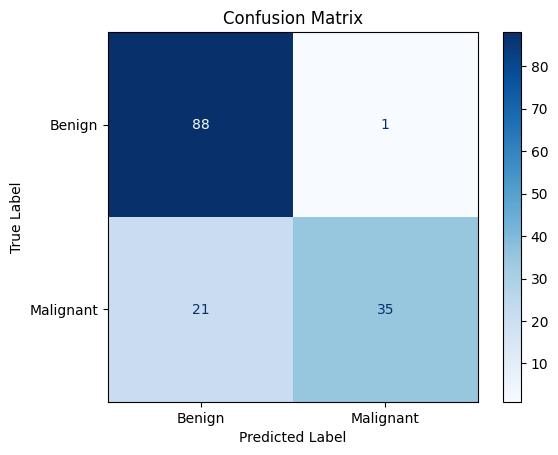

In [582]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<Figure size 800x600 with 0 Axes>

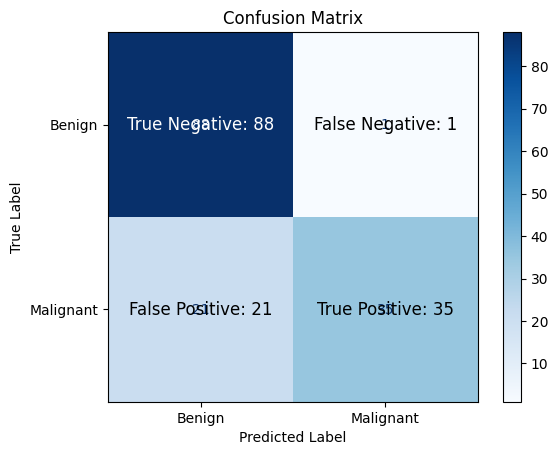

In [583]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')

# Add true positive and true negative values to the plot
tn, fp, fn, tp = cm.ravel()
plt.text(0, 0, f'True Negative: {tn}', color='white', ha='center', va='center', fontsize=12)
plt.text(0, 1, f'False Positive: {fn}', color='black', ha='center', va='center', fontsize=12)
plt.text(1, 0, f'False Negative: {fp}', color='black', ha='center', va='center', fontsize=12)
plt.text(1, 1, f'True Positive: {tp}', color='black', ha='center', va='center', fontsize=12)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **Test Dataset**

In [584]:
X_Test_Dataset = Test_Dataset.drop(['diagnosis'], axis=1)

In [585]:
# X_Test_Dataset.head()

In [586]:
y_Test_Dataset = Test_Dataset['diagnosis']

In [587]:
print(f"x_train: {X_Test_Dataset.shape} & y_train: {y_Test_Dataset.shape}")

x_train: (86, 30) & y_train: (86,)


In [603]:
y_true = y_Test_Dataset

y_pred = robot.predict(X_Test_Dataset)

correct_predictions = y_true == y_pred
correct_predictions = correct_predictions.reset_index()
correct_predictions = correct_predictions.diagnosis

n = 0
for i in correct_predictions:
  # print(i)
  if i == False:
    n += 1

print(f"{30 * '-'} prediction In The Test Dataset stage {30 * '-'}\n")

print(f"\nTotal predictions: {len(correct_predictions)}\n")
print(f"The sum of correct predictions: {len(correct_predictions) - n}\n")
print(f"The sum of incorrect predictions: {n}\n")

print(f"Percentage Of Incorrect Predictins In The Training Dataset: {(n * 100) / len(correct_predictions):.2f}%\n")
print(f"Percentage Of Correct Predictins In The Training Dataset: {100 - (n * 100) / len(correct_predictions):.2f}%\n")
print(f"{94 * '-'}")

------------------------------ prediction In The Test Dataset stage ------------------------------


Total predictions: 86

The sum of correct predictions: 79

The sum of incorrect predictions: 7

Percentage Of Incorrect Predictins In The Training Dataset: 8.14%

Percentage Of Correct Predictins In The Training Dataset: 91.86%

----------------------------------------------------------------------------------------------


In [589]:
# The ratio of the number of correct predictions to the total number of samples.
accuracy = accuracy_score(y_true, y_pred) * 100

# ------------------------------------------------
# The ratio of the number of true positive samples correctly detected to the total number of true positive samples.
# sensitivity = TP / (TP + FN) This is the same recall measure
recall = recall_score(y_true, y_pred) * 100

# ------------------------------------------------
# The ratio of the number of true positive samples correctly detected to the total number of samples detected as positive.
# Calculate the positive predictive value (PPV)
# ppv = TP / (TP + FP)
precision = precision_score(y_true, y_pred) * 100

# ------------------------------------------------
F1_score = f1_score(y_true, y_pred) * 100

# ------------------------------------------------
# Calculate the negative predictive value (NPV)
# npv = TN / (TN + FN)

# ------------------------------------------------
# محاسبه اختصاصیت (Specificity)
# specificity_score = TN / (TN + FP)

# ------------------------------------------------
# Calculate the positive likelihood ratio (LR+)
# lr_plus = recall_score(y_true, y_pred) / (1 - specificity_score(y_true, y_pred))


In [604]:
print(f"{30 * '-'} Evaluation Model In The Test Dataset stage {30 * '-'}\n")

print(f"Accuracy Score: {accuracy:.2f}%\n")
print(f"precision Score: {precision:.2f}%\n")
print(f"recall Score: {recall:.2f}%\n")
print(f"F1 Score: {F1_score:.2f}%\n")
print(f"{70 * '-'}")
print(f"confusion_matrix: \n\n{confusion_matrix(y_true, y_pred)}\n")
print(f"{70 * '-'}")
print(f"classification_report: \n\n{classification_report(y_true, y_pred)}\n")
print(f"{94 * '-'}")

------------------------------ Evaluation Model In The Test Dataset stage ------------------------------

Accuracy Score: 91.86%

precision Score: 94.12%

recall Score: 72.73%

F1 Score: 82.05%

----------------------------------------------------------------------
confusion_matrix: 

[[63  1]
 [ 6 16]]

----------------------------------------------------------------------
classification_report: 

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        64
         1.0       0.94      0.73      0.82        22

    accuracy                           0.92        86
   macro avg       0.93      0.86      0.88        86
weighted avg       0.92      0.92      0.91        86


----------------------------------------------------------------------------------------------


<Figure size 800x600 with 0 Axes>

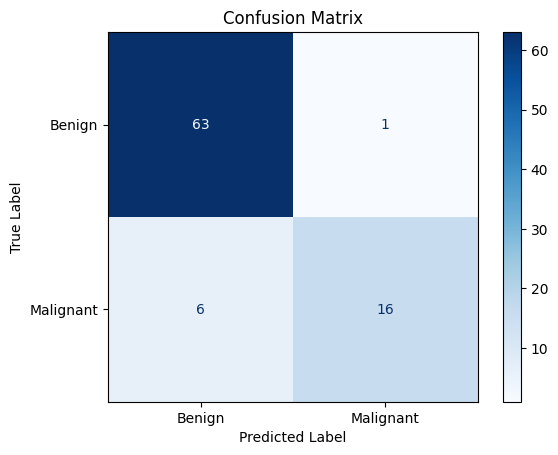

In [591]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<Figure size 800x600 with 0 Axes>

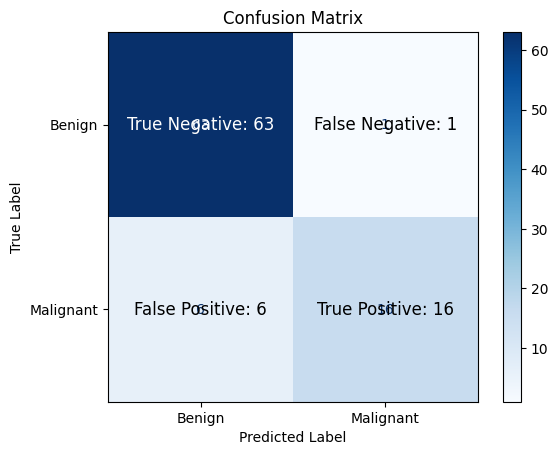

In [592]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')

# Add true positive and true negative values to the plot
tn, fp, fn, tp = cm.ravel()
plt.text(0, 0, f'True Negative: {tn}', color='white', ha='center', va='center', fontsize=12)
plt.text(0, 1, f'False Positive: {fn}', color='black', ha='center', va='center', fontsize=12)
plt.text(1, 0, f'False Negative: {fp}', color='black', ha='center', va='center', fontsize=12)
plt.text(1, 1, f'True Positive: {tp}', color='black', ha='center', va='center', fontsize=12)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
